In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob, time, datetime, re

In [2]:
files = glob.glob("../data/springfield_springfield_all/"+"*.csv")
shows = pd.concat([pd.read_csv(file, lineterminator='\n') for file in files])

In [3]:
shows.shape

(117937, 3)

In [4]:
shows.head()

,text,episode_name,show_name
0,Can it be the breeze that fills the trees\r W...,The Nicked Knockwurst,'Allo 'Allo! (1982) s03e01 Episode Script
1,Madame Peyet is in the family way.\r She is p...,Gruber Does Some Mincing,'Allo 'Allo! (1982) s03e02 Episode Script
2,Ooar!\r Ooh!\r Are you by any chance curious...,The Sausage in the Wardrobe,'Allo 'Allo! (1982) s03e03 Episode Script
3,It is possible that\r the more curious among y...,The Flight of Fancy,'Allo 'Allo! (1982) s03e04 Episode Script
4,Oh. Do you by any chance wish to know\r how I...,Pretty Maids All in a Row,'Allo 'Allo! (1982) s03e05 Episode Script


In [5]:
shows.tail()

,text,episode_name,show_name
42093,: Out of the night When the full moon ls brigh...,The Flaming Arrow,Zorro (1957) s02e11 Episode Script
42094,: Out of the night When the full moon ls brigh...,Zorro Fights a Duel,Zorro (1957) s02e12 Episode Script
42095,: Out of the night When the full moon ls brigh...,Amnesty for Zorro,Zorro (1957) s02e13 Episode Script
42096,: Out of the night When the full moon ls brigh...,The Runaways,Zorro (1957) s02e14 Episode Script
42097,: Out of the night When the full moon ls brigh...,The Iron Box,Zorro (1957) s02e15 Episode Script


In [6]:
shows.isnull().sum()

text            151
episode_name      4
show_name         1
dtype: int64

In [7]:
shows[shows["text"].isnull()]["show_name"].value_counts()

The A-Team (1983) Episode Scripts         15
Shaun the Sheep (2007) Episode Scripts     9
TV Show Episode Scripts                    3
COPS (1989) s27e02 Episode Script          1
COPS (1989) s26e14 Episode Script          1
                                          ..
Top Gear (2002) s10e10 Episode Script      1
COPS (1989) s26e13 Episode Script          1
COPS (1989) s28e16 Episode Script          1
COPS (1989) s27e07 Episode Script          1
COPS (1989) s27e23 Episode Script          1
Name: show_name, Length: 126, dtype: int64

#### Cleaning Show Name Column

There is one row with no information. Will drop then clean remaining items in show_name column

In [3]:
shows[shows["show_name"].isnull()].shape
shows = shows.drop(shows[shows["show_name"].isnull()].index)

In [4]:
shows["show_name"] = shows["show_name"].str.replace("Episode Script", "")

#### There are 151 rows that do not have a script, will drop

In [5]:
shows = shows.drop(shows[shows["text"].isnull()].index)

In [6]:
shows.isnull().sum()

text            0
episode_name    0
show_name       0
dtype: int64

In [7]:
shows.shape

(117416, 3)

In [8]:
shows.head()

,text,episode_name,show_name
0,Can it be the breeze that fills the trees\r W...,The Nicked Knockwurst,'Allo 'Allo! (1982) s03e01
1,Madame Peyet is in the family way.\r She is p...,Gruber Does Some Mincing,'Allo 'Allo! (1982) s03e02
2,Ooar!\r Ooh!\r Are you by any chance curious...,The Sausage in the Wardrobe,'Allo 'Allo! (1982) s03e03
3,It is possible that\r the more curious among y...,The Flight of Fancy,'Allo 'Allo! (1982) s03e04
4,Oh. Do you by any chance wish to know\r how I...,Pretty Maids All in a Row,'Allo 'Allo! (1982) s03e05


In [9]:
shows.tail()

,text,episode_name,show_name
42093,: Out of the night When the full moon ls brigh...,The Flaming Arrow,Zorro (1957) s02e11
42094,: Out of the night When the full moon ls brigh...,Zorro Fights a Duel,Zorro (1957) s02e12
42095,: Out of the night When the full moon ls brigh...,Amnesty for Zorro,Zorro (1957) s02e13
42096,: Out of the night When the full moon ls brigh...,The Runaways,Zorro (1957) s02e14
42097,: Out of the night When the full moon ls brigh...,The Iron Box,Zorro (1957) s02e15


In [10]:
shows[shows["show_name"].str.contains(r"s\d{2}e\d*")]

,text,episode_name,show_name
0,Can it be the breeze that fills the trees\r W...,The Nicked Knockwurst,'Allo 'Allo! (1982) s03e01
1,Madame Peyet is in the family way.\r She is p...,Gruber Does Some Mincing,'Allo 'Allo! (1982) s03e02
2,Ooar!\r Ooh!\r Are you by any chance curious...,The Sausage in the Wardrobe,'Allo 'Allo! (1982) s03e03
3,It is possible that\r the more curious among y...,The Flight of Fancy,'Allo 'Allo! (1982) s03e04
4,Oh. Do you by any chance wish to know\r how I...,Pretty Maids All in a Row,'Allo 'Allo! (1982) s03e05
...,...,...,...
42093,: Out of the night When the full moon ls brigh...,The Flaming Arrow,Zorro (1957) s02e11
42094,: Out of the night When the full moon ls brigh...,Zorro Fights a Duel,Zorro (1957) s02e12
42095,: Out of the night When the full moon ls brigh...,Amnesty for Zorro,Zorro (1957) s02e13
42096,: Out of the night When the full moon ls brigh...,The Runaways,Zorro (1957) s02e14


#### Cleaning the show_name column
Loop through each element, if it contains the season episode pattern, split on the s and then the e to extract the season and episode numbers.

In [6]:
def clean_show_name_col(df):
    season_nums = []
    episode_nums = []
    show_names = []
    years = []
    manual = []

    for show in df["show_name"]:
        if re.search(r"s\d{2}e\d*", show):
            season_split = show.rsplit("s", maxsplit=1)
            #pulling out the season and episode numbers
            season_episode = season_split[1]
            season_episode_split = season_episode.split("e")
            season_num = season_episode_split[0].strip()
            episode_num = season_episode_split[1].strip()
            season_nums.append(season_num)
            episode_nums.append(episode_num)
            manual.append(0)

            #show name and year (if available)
            show_year = season_split[0]
            if re.search(r"\(\d{4}\)", show_year):
                show_year_split = show_year.rsplit("(", maxsplit=1)
                show_name = show_year_split[0].strip()
                show_names.append(show_name)
                year = show_year_split[1].strip().replace(")", "")
                years.append(year)
            else:
                show_names.append(show_year)
                years.append(0)
        else:
            show_names.append(show)
            manual.append(1)
            season_nums.append("missing")
            episode_nums.append("missing")
            years.append(0)
            
            
    df["show_names"] = show_names
    df["season_number"] = season_nums
    df["episode_number"] = episode_nums
    df["show_year"] = years
    df["manual"] = manual

In [7]:
clean_show_name_col(shows)

In [13]:
#remove escape characters and punctuation from text
shows["text"] = shows["text"].str.replace(r"\r|\t|\n|\v", "")

In [19]:
#shows["text"] = shows["text"].str.replace(r"\.|\,|\?|\!|\-|\(|\)", "")

In [31]:
#shows["text"] = shows["text"].str.replace(r"\[|\]|\~|\*|\:|\;", "")

In [14]:
shows["text"] = shows["text"].str.replace("\\", "")

In [15]:
shows["show_names"] = shows["show_names"].str.replace('"', "")

In [16]:
#reset index
shows = shows.reset_index(drop=True)

In [17]:
shows.head(20)

,text,episode_name,show_name,show_names,season_number,episode_number,show_year,manual
0,Can it be the breeze that fills the trees Wit...,The Nicked Knockwurst,'Allo 'Allo! (1982) s03e01,'Allo 'Allo!,03,01,1982,0
1,Madame Peyet is in the family way. She is ple...,Gruber Does Some Mincing,'Allo 'Allo! (1982) s03e02,'Allo 'Allo!,03,02,1982,0
2,Ooar! Ooh! Are you by any chance curious to ...,The Sausage in the Wardrobe,'Allo 'Allo! (1982) s03e03,'Allo 'Allo!,03,03,1982,0
3,It is possible that the more curious among you...,The Flight of Fancy,'Allo 'Allo! (1982) s03e04,'Allo 'Allo!,03,04,1982,0
4,"Oh. Do you by any chance wish to know how I, ...",Pretty Maids All in a Row,'Allo 'Allo! (1982) s03e05,'Allo 'Allo!,03,05,1982,0
5,Every little breeze seems to whisper Louise B...,The Great Un-Escape,'Allo 'Allo! (1982) s03e06,'Allo 'Allo!,03,06,1982,0
6,There cannot be many French café owners in a p...,Hans Goes Over the Top,'Allo 'Allo! (1982) s04e01,'Allo 'Allo!,04,01,1982,0
7,You are probably wondering what I am doing in ...,Camp Dance,'Allo 'Allo! (1982) s04e02,'Allo 'Allo!,04,02,1982,0
8,Ah The more observant among you may note that...,Good Staff are Hard to Find,'Allo 'Allo! (1982) s04e03,'Allo 'Allo!,04,03,1982,0
9,Things are looking up. A slip of the tongue b...,The Flying Nun,'Allo 'Allo! (1982) s04e04,'Allo 'Allo!,04,04,1982,0


In [ ]:
something = shows.loc[0, "text"]

In [ ]:
something.replace('\\', '')

In [ ]:
something[:800]

In [ ]:
shows["show_year"].value_counts()

In [ ]:
shows["manual"].value_counts()

In [18]:
shows["show_year"] = shows["show_year"].astype(int)

In [19]:
shows[shows["manual"] == 1]

,text,episode_name,show_name,show_names,season_number,episode_number,show_year,manual
1593,This programme contains strong language and ad...,"Alan Carr, Kevin Bridges, Cariad Lloyd, Elis J...",8 Out Of 10 Cats Does Countdown (2012) a12e01,8 Out Of 10 Cats Does Countdown (2012) a12e01,missing,missing,0,1
7689,JTBC Idol Room Episode 26 - Twice [Ye~ Come ...,Twice,Idol Room (2018) s-1e26,Idol Room (2018) s-1e26,missing,missing,0,1
47298,"Martin. Louisa. Come on through. Hello, Dr Ry...",Equilibrium,Doc Martin (2004) s0e906,Doc Martin (2004) s0e906,missing,missing,0,1
54360,"1 Previously on AMC's ""Fear the Walking Dead"" ...",Another Day in the Diamond,Fear The Walking Dead (2015) s040e2,Fear The Walking Dead (2015) s040e2,missing,missing,0,1
55332,- (CHATTERING) - (LIVELY MUSIC) The Toronto S...,Extra Innings,Frankie Drake Mysteries (2017) s020e6,Frankie Drake Mysteries (2017) s020e6,missing,missing,0,1
89211,"1 I'm having this baby here! Cheyenne, this i...",Strike,Superstore (2015) s020e1,Superstore (2015) s020e1,missing,missing,0,1
94957,"We've seen fragments before, enough to confir...",The Hell Within Him,The Fall (2013) s0e304,The Fall (2013) s0e304,missing,missing,0,1


In [20]:
#manual cleaning of 7 rows with typos and not caught by function
shows.at[1593, "season_number"] = 12
shows.at[1593, "episode_number"] = 1
shows.at[1593, "show_names"] = "8 Out of 10 Cats Does Countdown"
shows.at[1593, "show_year"] = 2012

shows.at[7689, "show_names"] = "Idol Room"
shows.at[7689, "season_number"] = 1
shows.at[7689, "episode_number"] = 26
shows.at[7689, "show_year"] = 2018

shows.at[47298, "show_names"] = "Doc Martin"
shows.at[47298, "season_number"] = 9
shows.at[47298, "episode_number"] = 6
shows.at[47298, "show_year"] = 2004

shows.at[54360, "show_names"] = "Fear the Walking Dead"
shows.at[54360, "season_number"] = 4
shows.at[54360, "episode_number"] = 2
shows.at[54360, "show_year"] = 2015

shows.at[55332, "show_names"] = "Frankie Drake Mysteries"
shows.at[55332, "season_number"] = 2
shows.at[55332, "episode_number"] = 6
shows.at[55332, "show_year"] = 2017

shows.at[89211, "show_names"] = "Superstore"
shows.at[89211, "season_number"] = 2
shows.at[89211, "episode_number"] = 1
shows.at[89211, "show_year"] = 2015

shows.at[94957, "show_names"] = "The Fall"
shows.at[94957, "season_number"] = 3
shows.at[94957, "episode_number"] = 4
shows.at[94957, "show_year"] = 2013

In [21]:
#check rows
shows.loc[[1593, 7689, 47298, 54360, 55332, 89211, 94957]]

,text,episode_name,show_name,show_names,season_number,episode_number,show_year,manual
1593,This programme contains strong language and ad...,"Alan Carr, Kevin Bridges, Cariad Lloyd, Elis J...",8 Out Of 10 Cats Does Countdown (2012) a12e01,8 Out of 10 Cats Does Countdown,12,1,2012,1
7689,JTBC Idol Room Episode 26 - Twice [Ye~ Come ...,Twice,Idol Room (2018) s-1e26,Idol Room,1,26,2018,1
47298,"Martin. Louisa. Come on through. Hello, Dr Ry...",Equilibrium,Doc Martin (2004) s0e906,Doc Martin,9,6,2004,1
54360,"1 Previously on AMC's ""Fear the Walking Dead"" ...",Another Day in the Diamond,Fear The Walking Dead (2015) s040e2,Fear the Walking Dead,4,2,2015,1
55332,- (CHATTERING) - (LIVELY MUSIC) The Toronto S...,Extra Innings,Frankie Drake Mysteries (2017) s020e6,Frankie Drake Mysteries,2,6,2017,1
89211,"1 I'm having this baby here! Cheyenne, this i...",Strike,Superstore (2015) s020e1,Superstore,2,1,2015,1
94957,"We've seen fragments before, enough to confir...",The Hell Within Him,The Fall (2013) s0e304,The Fall,3,4,2013,1


In [22]:
#drop show_name column and manual now that show_name column is cleaned
shows = shows.drop(columns=["show_name", "manual"])

In [23]:
shows.head()

,text,episode_name,show_names,season_number,episode_number,show_year
0,Can it be the breeze that fills the trees Wit...,The Nicked Knockwurst,'Allo 'Allo!,03,01,1982
1,Madame Peyet is in the family way. She is ple...,Gruber Does Some Mincing,'Allo 'Allo!,03,02,1982
2,Ooar! Ooh! Are you by any chance curious to ...,The Sausage in the Wardrobe,'Allo 'Allo!,03,03,1982
3,It is possible that the more curious among you...,The Flight of Fancy,'Allo 'Allo!,03,04,1982
4,"Oh. Do you by any chance wish to know how I, ...",Pretty Maids All in a Row,'Allo 'Allo!,03,05,1982


In [24]:
#just in case remove any whitespaces from show_names
shows["show_names"] = [show.strip() for show in shows["show_names"]]

In [25]:
#create csv with cleaned episodes
shows.to_csv("../data/episodes_cleaned.csv", index=False)

#### 4667 TV shows total

In [26]:
len(set(shows["show_names"]))

4667

##### creating a list of all the show names in dataset to use to grab user reviews from another site

In [27]:
show_list = list(set(shows["show_names"]))

In [28]:
show_list

['Plebs',
 'The Murders',
 'Mork and Mindy',
 'Republic of Doyle',
 'The Playboy Club',
 'The Mystery of Edwin Drood',
 'Material Girl',
 'Persona 4: The Animation',
 'The Amazing Race',
 'Doctor Who Extra',
 'Father Brown',
 'Britain by Bike',
 'Mind Games',
 'Victim Number 8',
 'Sneaky Pete',
 'Sanford and Son',
 'Suspects',
 'Costume Quest',
 'Profiler',
 'Baretta',
 "Lil' Bush: Resident of the United States",
 'The Edwardians',
 'Aqua Teen Hunger Force',
 'Studio One',
 'Kavanagh QC',
 'The Magicians',
 'Tru Calling',
 'HarmonQuest',
 'Jake 2.0',
 'The Carrie Diaries',
 'The Get Down',
 'Eastwick',
 'The Muppets',
 'The Company',
 'Millennium',
 'Kung Fu',
 'Strangers',
 'Gormenghast',
 'Big Day',
 'Jean Claude Van Johnson',
 'Whose Line Is It Anyway?',
 'Sick Note',
 'Natural World',
 'Bloody Tales of the Tower',
 'Skins',
 'Endgame',
 'Drop Dead Diva',
 'After the Runway',
 'Cranford',
 "That's So Raven",
 'Getting On',
 'Empires: The Roman Empire in the First Century',
 'Shootin

In [29]:
show_df = pd.DataFrame(show_list, columns=["show_names"])

In [30]:
show_df.to_csv("../data/show_list.csv", index=False)

In [31]:
df = pd.read_csv("../data/show_list.csv")

#### Adding in the missing year data using IMDb

In [32]:
shows[shows["show_year"] == 0].groupby("show_names").count()

,text,episode_name,season_number,episode_number,show_year
show_names,,,,,
'Til Death,71,71,71,71,71
"1,000 Places To See Before You Die",2,2,2,2,2
10 Things I Hate About You,20,20,20,20,20
100 Questions,5,5,5,5,5
1000 Ways to Die,32,32,32,32,32
...,...,...,...,...,...
Xena: Warrior Princess,134,134,134,134,134
Young Justice,71,71,71,71,71
Zero Hour,13,13,13,13,13


In [33]:
shows[shows["show_year"] > 0]["show_year"].sort_values()

30523    1943
30525    1943
30524    1943
30522    1943
30521    1943
         ... 
80242    2019
80241    2019
9614     2019
57781    2019
1919     2019
Name: show_year, Length: 71268, dtype: int64

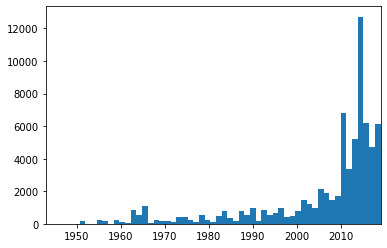

In [34]:

plt.hist(shows[shows["show_year"]!= 0]["show_year"], bins=59)
plt.xlim(1943, 2019);

## Creating Dataset containing episode text grouped by show
___

In [35]:
#https://stackoverflow.com/questions/46826773/how-can-i-merge-rows-by-same-value-in-a-column-in-pandas-with-aggregation-func
agg = {"text": "sum", "show_names": "first"}
shows_grouped = shows.groupby(shows["show_names"]).aggregate(agg)
shows_grouped.head()

,text,show_names
show_names,,
'Allo 'Allo!,Can it be the breeze that fills the trees Wit...,'Allo 'Allo!
'Til Death,I'd like to marry a girl that's skinny. I thin...,'Til Death
07 Ghost,It's that dream again. Just who is that guy? W...,07 Ghost
"1,000 Places To See Before You Die",1 You all might have top-class credentials fro...,"1,000 Places To See Before You Die"
10 O'Clock Live,1 Welcome to 10 O'Clock Live. It's Wednesday ...,10 O'Clock Live


In [36]:
shows_grouped = shows_grouped.reset_index(drop=True)

In [37]:
shows_grouped.tail(10)

,text,show_names
4657,"1 Thanks. Oh, there wasn't any sugar. Legs o...",Zomboat!
4658,"Hey, Murdoch. What's the matter, boy? Huh? W...",Zoo
4659,"Ole, guapa. Bueno. Ole. Ole. Viva Espana. Ole....",Zorro
4660,I wanna be the big man. - I wanna be the big ...,five by five
4661,"Carly, get in here. Right now. Have a seat. So...",iCarly
4662,1 Liv: This was my life before I died. 17-yea...,iZombie
4663,G'd morning Bree! Hey buddy! Ready for your i...,jPod
4664,it's because we all came from the sea. And it ...,seaQuest DSV
4665,"Hey, where are we going today? I can see the ...",xxxHOLiC
4666,1 [ELECTRICITY GLITCHES.] [SAMU BREATHING HE...,Élite


In [38]:
shows_grouped.to_csv("../data/show_text_combined.csv", index=False)